# Pair probabilities for an asymmetric mixture

In this document we compare results from our `Pairwise` implementation with the ones obtained with classic models.

We start by importing the necessary packages.

In [1]:
import math, os, sys
import matplotlib.pyplot as plt
import pandas as pd

parent_directory = os.path.dirname(os.path.abspath('.'))
sys.path.append(parent_directory)

from pysac import SAC, RGAS

### Compound definitions

For the symmetric case, we set both compounds as having an unitary area such that area fractions match molar fractions (size simmetry). Additionally, in order to compare the results with the cubic lattice system we need to set `Q_eff = 1/z`.


In [2]:
Q_1   = [1]
Q_2   = [10]

z = 6
Q_eff = 1/z

# The mixture area
Q = [Q_1, Q_2]

## Interaction energies

Here we study the case of a strongly non-ideal mixture, where the first compound (0-0) interaction is strongly attractive when compared to the others:

In [3]:
class MonomerStronglyNonIdeal(SAC):
    def __init__(self):
        super().__init__(Q_eff=Q_eff)

    def calc_u(self, T, i, j, m, n):
        if i == 0 and j == 0:
            return -0.65 * RGAS * self.T
        if i == 1 and j == 1:
            return -0.1 * RGAS * self.T
        
        return -0.2 * RGAS * self.T

# Create an instance of our F-SAC class
sac = MonomerStronglyNonIdeal()

# Set a temperature, actually the way we define the energies, any temperature
# would produce the same results
T = 300
sac.set_compounds(Q)
sac.set_temperature(T)

Now we compare the `Gamma_2/Gamma1` quotient for different models. For UNIQUAC this quotient is always 1 while for the NRTL model it is a constant different from 1.

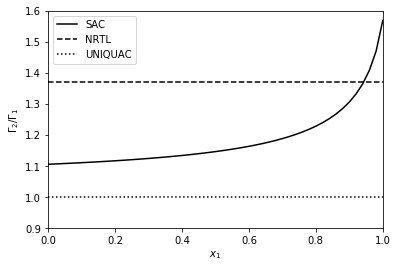

In [4]:
N = 51
ue_pw = []
ae_pw = []

gamma2_gamma1 = []
gamma2_gamma1_wilson = []
gamma2_gamma1_nrtl = []
x1 = []
alpha = 0.3

for l in range(N):
    x1_ = l/(N-1)
    x1.append(x1_)

    x = [x1_, 1-x1_]
    
    sac.set_composition(x)
    sac.calc_ln_gamma()

    gamma2_gamma1.append(sac.seg_gamma[1][0]/sac.seg_gamma[0][0])
    gamma2_gamma1_wilson.append(1)
    gamma2_gamma1_nrtl.append(math.pow(sac.psi[0][0][0][0]/sac.psi[0][1][0][0], 1-alpha))


plt.plot(x1, gamma2_gamma1, 'k-', label='SAC')
plt.plot(x1, gamma2_gamma1_nrtl, 'k--', label='NRTL')
plt.plot(x1, gamma2_gamma1_wilson, 'k:', label='UNIQUAC')

plt.xlabel(r'$x_1$')
plt.ylabel(r'$\Gamma_2/\Gamma_1$')
plt.legend(loc='upper left')
plt.xlim([0, 1])
plt.ylim([0.9, 1.6])

plt.rcParams.update({'font.size': 14})
plt.plot()
plt.savefig('pdf/prob-asymmetric.pdf')